<a href="https://colab.research.google.com/github/raj075512/check_your_drug_addicted_categroy/blob/main/major_project_patient_condition_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)

In [2]:
df=pd.read_csv('/content/drive/MyDrive/data_set_ml project/drugsComTrain_raw.csv')

In [3]:
df.head(2)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192


In [4]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [5]:
df_train = df[(df['condition']=='Anxiety') | (df['condition']=='Depression')|(df['condition']=='Pain')|(df['condition']=='Bipolar Disorde')]

In [6]:
df.shape


(161297, 7)

In [7]:
df_train.shape

(25342, 7)

In [8]:
X = df_train.drop(['drugName','rating','date','usefulCount','uniqueID'],axis=1)

In [9]:
X.head()

,condition,review
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
11,Depression,"""I have taken anti-depressants for years, with..."
18,Bipolar Disorde,"""I&#039;ve been on every medicine under the su..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
32,Pain,"""I am 30 years old. I had a multiple composite..."


EDA


In [10]:
X.condition.value_counts()

Depression         9069
Pain               6145
Anxiety            5904
Bipolar Disorde    4224
Name: condition, dtype: int64

In [11]:
X.head()

,condition,review
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
11,Depression,"""I have taken anti-depressants for years, with..."
18,Bipolar Disorde,"""I&#039;ve been on every medicine under the su..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
32,Pain,"""I am 30 years old. I had a multiple composite..."


In [12]:
X.shape


(25342, 2)

In [13]:
df_train.shape

(25342, 7)

In [14]:
X.head()

,condition,review
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
11,Depression,"""I have taken anti-depressants for years, with..."
18,Bipolar Disorde,"""I&#039;ve been on every medicine under the su..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
32,Pain,"""I am 30 years old. I had a multiple composite..."


Segregating the data frame for analysing the individual condition

In [15]:

X_pain=X[(X['condition']=='Pain')]
X_depression=X[(X['condition']=='Depression')]
X_anxiety=X[(X['condition']=='Anxiety')]
X_bipolar_disorder=X[(X['condition']=='Bipolar Disorde')]

Representation in the word cloud

In [16]:
from wordcloud import WordCloud

In [17]:
plt.figure(figsize=(20,20))    #text that is Fake news headlines


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [18]:
wc=WordCloud(max_words=500 ,width=1600 ,height=800).generate(" ".join(X_pain.review))

Text(0.5, 1.0, "cloud word for ' pain '  ")

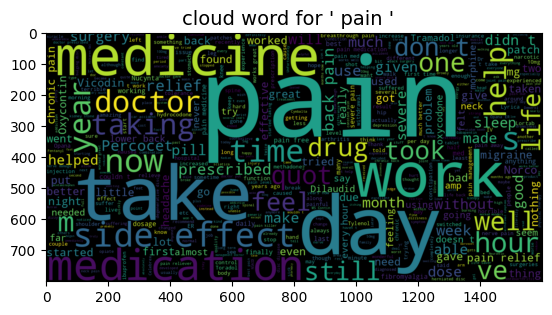

In [19]:
plt.imshow(wc,interpolation="bilinear")
plt.title("cloud word for ' pain '  ",fontsize=14)

get the word cloud for depression

In [20]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1300 ,height=1300, width=1200).generate(" ".join(X_depression.review))


<Figure size 2000x2000 with 0 Axes>

Text(0.5, 1.0, 'cloud for depression ')

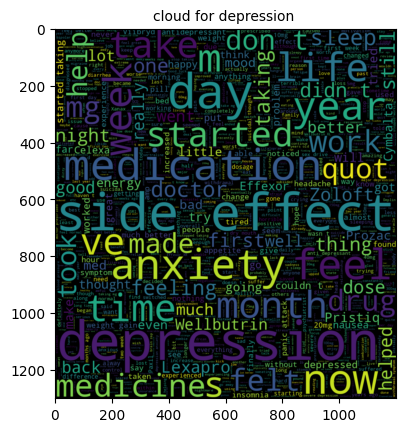

In [21]:
plt.imshow(wc,interpolation="bilinear")
plt.title("cloud for depression ",fontsize=10)

Text(0.5, 1.0, 'Word cloud for biploar disorder')

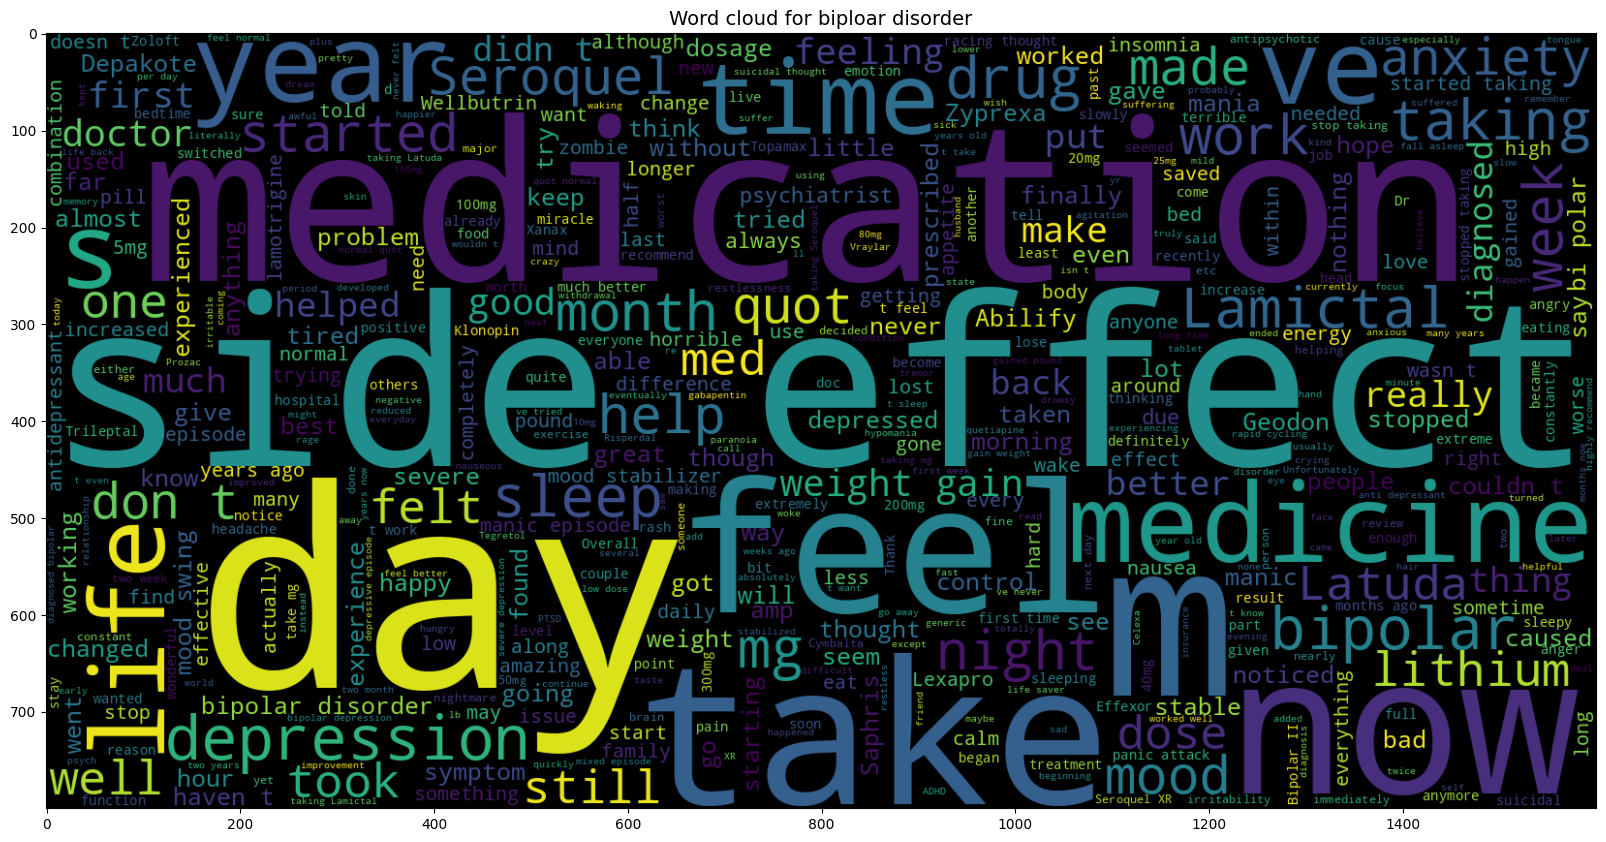

In [22]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bipolar_disorder.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for biploar disorder',fontsize=14)

Text(0.5, 1.0, 'Word cloud for anxeity')

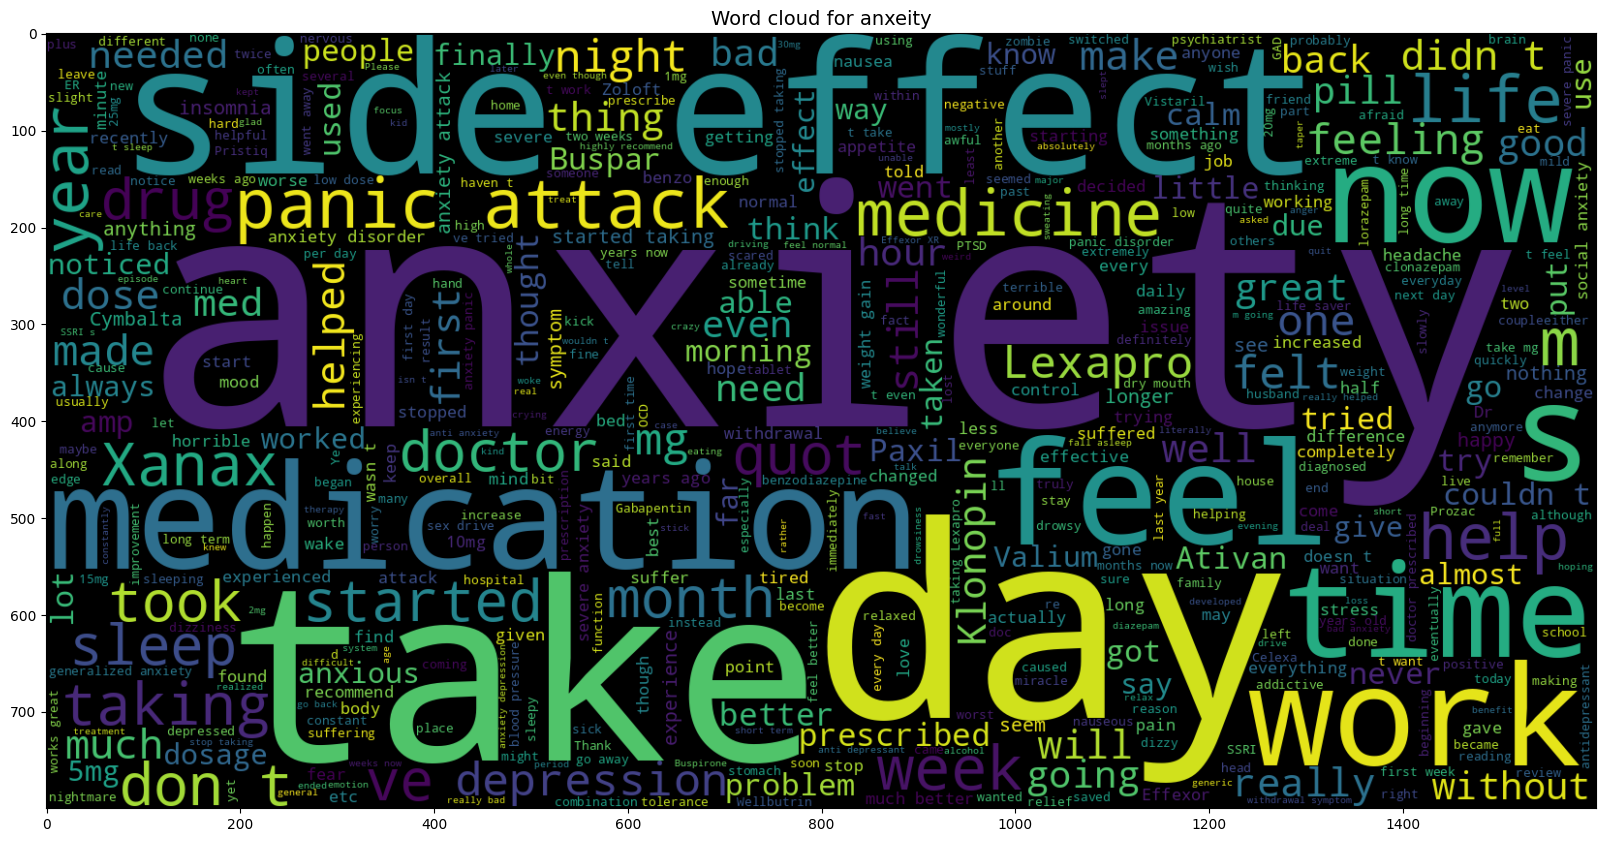

In [56]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_anxiety.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for anxeity',fontsize=14)

DATA PREPROCESSING

In [57]:
X['review'][11]

'I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.'

In [58]:
X.head()

,condition,review,review_clean
7,Bipolar Disorde,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.",abilify changed life hope zoloft clonidine first started abilify age zoloft depression clondine manage complete rage mood control depressed hopeless one second mean irrational full rage next dr prescribed mg abilify point feel like cured though know bi polar disorder constant battle know abilify work tried get lost complete control emotion went back golden mg x daily better ever past side effect like eat lot
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
18,Bipolar Disorde,"I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety.",every medicine sun seems manage hypomania mania bipolar within day starting lamictal tegretol someone turned light head way normal people think one first thing struck sleep like log irritability almost anger would considered normal able focus creative impulsive thought decreased enough manageable god send would perennially state hypo mania sound great physically emotionally exhausted libido markedly lower wonder perhaps effect hypo manic take mg anxiety
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.,week zoloft anxiety mood swing take mg morning breakfast nausea day one subsided week went get jitter hr taking followed yawning feel much better though le angry stressed
32,Pain,I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can funct

In [59]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [60]:
# set the width of the column to maximum
pd.set_option('max_colwidth',-1)

<ipython-input-60-7a238e8c8618>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth',-1)


In [61]:
X.head()

,condition,review,review_clean
7,Bipolar Disorde,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.",abilify changed life hope zoloft clonidine first started abilify age zoloft depression clondine manage complete rage mood control depressed hopeless one second mean irrational full rage next dr prescribed mg abilify point feel like cured though know bi polar disorder constant battle know abilify work tried get lost complete control emotion went back golden mg x daily better ever past side effect like eat lot
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
18,Bipolar Disorde,"I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety.",every medicine sun seems manage hypomania mania bipolar within day starting lamictal tegretol someone turned light head way normal people think one first thing struck sleep like log irritability almost anger would considered normal able focus creative impulsive thought decreased enough manageable god send would perennially state hypo mania sound great physically emotionally exhausted libido markedly lower wonder perhaps effect hypo manic take mg anxiety
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.,week zoloft anxiety mood swing take mg morning breakfast nausea day one subsided week went get jitter hr taking followed yawning feel much better though le angry stressed
32,Pain,I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can funct

In [62]:
# remove the quote
for i ,col  in enumerate(X.columns):
  X.iloc[:,i]=X.iloc[:,i].str.replace('"','')

In [63]:
X.head()

,condition,review,review_clean
7,Bipolar Disorde,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.",abilify changed life hope zoloft clonidine first started abilify age zoloft depression clondine manage complete rage mood control depressed hopeless one second mean irrational full rage next dr prescribed mg abilify point feel like cured though know bi polar disorder constant battle know abilify work tried get lost complete control emotion went back golden mg x daily better ever past side effect like eat lot
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
18,Bipolar Disorde,"I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety.",every medicine sun seems manage hypomania mania bipolar within day starting lamictal tegretol someone turned light head way normal people think one first thing struck sleep like log irritability almost anger would considered normal able focus creative impulsive thought decreased enough manageable god send would perennially state hypo mania sound great physically emotionally exhausted libido markedly lower wonder perhaps effect hypo manic take mg anxiety
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.,week zoloft anxiety mood swing take mg morning breakfast nausea day one subsided week went get jitter hr taking followed yawning feel much better though le angry stressed
32,Pain,I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can funct

cleaning the unwanted word -> stopWords

In [64]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop=stopwords.words('english')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [66]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()


print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

# print(lemmatizer.lemmatize("sportingly"))
# print(lemmatizer.lemmatize("very"))
# print(lemmatizer.lemmatize("troubled"))

sportingli
veri
troubl


In [67]:
from bs4 import BeautifulSoup
import re

In [68]:
def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [69]:
import nltk
nltk.download('wordnet')
X['review_clean']=X['review'].apply(review_to_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-68-d3704c7e38b3>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [70]:
X.head()


,condition,review,review_clean
7,Bipolar Disorde,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.",abilify changed life hope zoloft clonidine first started abilify age zoloft depression clondine manage complete rage mood control depressed hopeless one second mean irrational full rage next dr prescribed mg abilify point feel like cured though know bi polar disorder constant battle know abilify work tried get lost complete control emotion went back golden mg x daily better ever past side effect like eat lot
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
18,Bipolar Disorde,"I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety.",every medicine sun seems manage hypomania mania bipolar within day starting lamictal tegretol someone turned light head way normal people think one first thing struck sleep like log irritability almost anger would considered normal able focus creative impulsive thought decreased enough manageable god send would perennially state hypo mania sound great physically emotionally exhausted libido markedly lower wonder perhaps effect hypo manic take mg anxiety
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.,week zoloft anxiety mood swing take mg morning breakfast nausea day one subsided week went get jitter hr taking followed yawning feel much better though le angry stressed
32,Pain,I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can funct

CREATING features and target variables

In [71]:
X_feat=X['review_clean']
y=X['condition']

In [72]:
X_train,X_test,y_train,y_test =train_test_split(X_feat,y,stratify=y,test_size=0.2,random_state=0)

In [73]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Bag of words

In [74]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [75]:
count_train

<20273x14661 sparse matrix of type '<class 'numpy.int64'>'
	with 583415 stored elements in Compressed Sparse Row format>

Machine learning Model : Naive bayes

accuracy:   0.827
Confusion matrix, without normalization


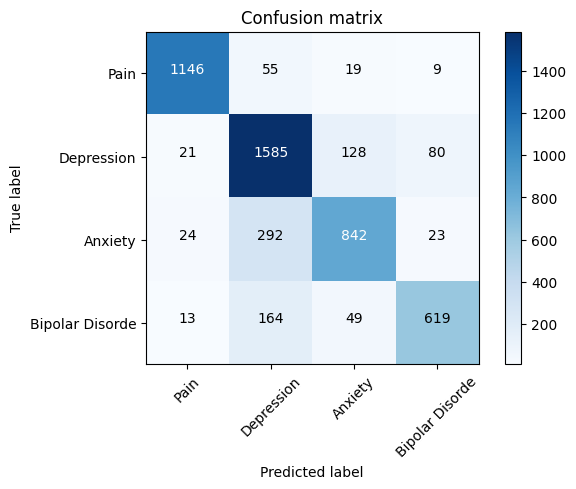

In [76]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Pain', 'Depression','Anxiety','Bipolar Disorde'])
plot_confusion_matrix(cm, classes=['Pain', 'Depression','Anxiety','Bipolar Disorde'])

machine learning :passive aggressive classifer

accuracy:   0.844
Confusion matrix, without normalization


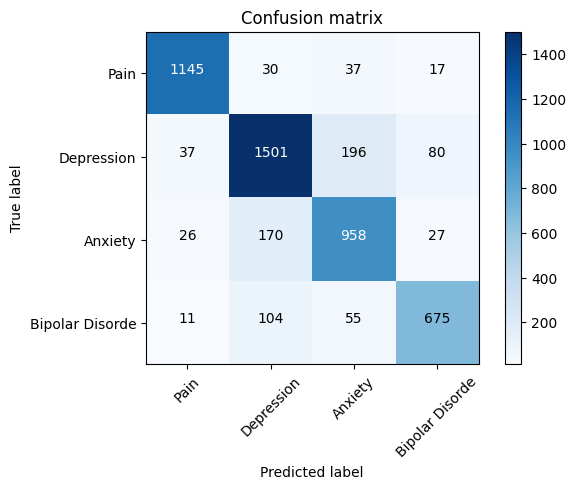

In [77]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
# cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
# plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
cm=metrics.confusion_matrix(y_test,pred,labels=['Pain','Depression','Anxiety','Bipolar Disorde'])
plot_confusion_matrix(cm,classes=['Pain','Depression','Anxiety','Bipolar Disorde'])

TFIDF

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Machine Learning Model : Naive Bayes

accuracy:   0.672
Confusion matrix, without normalization


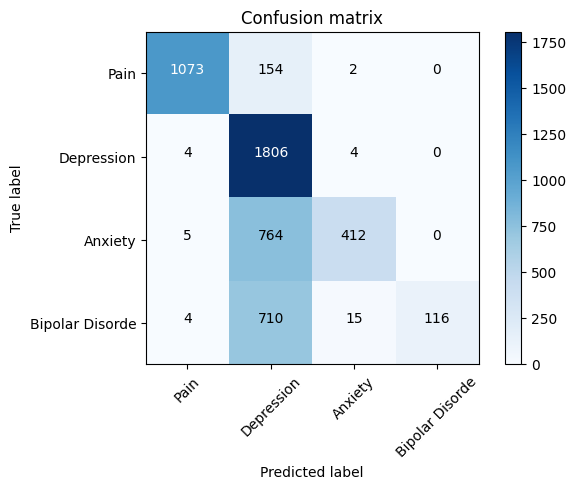

In [91]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm=metrics.confusion_matrix(y_test,pred,labels=['Pain','Depression','Anxiety','Bipolar Disorde'])
plot_confusion_matrix(cm,classes=['Pain','Depression','Anxiety','Bipolar Disorde'])

## Machine Learning Model TFIDF

accuracy:   0.857
Confusion matrix, without normalization


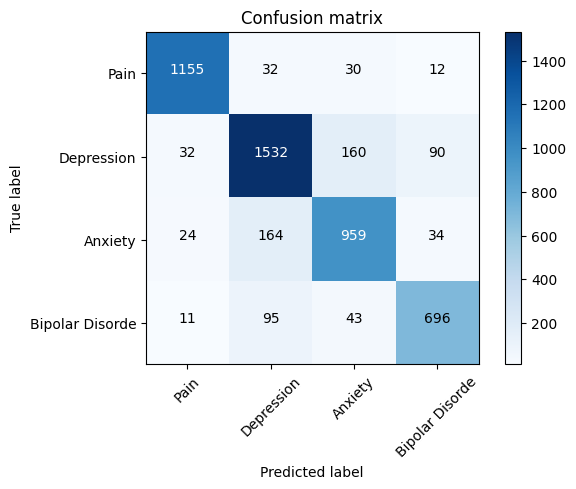

In [92]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
# cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
# plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

cm=metrics.confusion_matrix(y_test,pred,labels=['Pain','Depression','Anxiety','Bipolar Disorde'])
plot_confusion_matrix(cm,classes=['Pain','Depression','Anxiety','Bipolar Disorde'])


TFIDF : Bigrams

accuracy:   0.901
Confusion matrix, without normalization


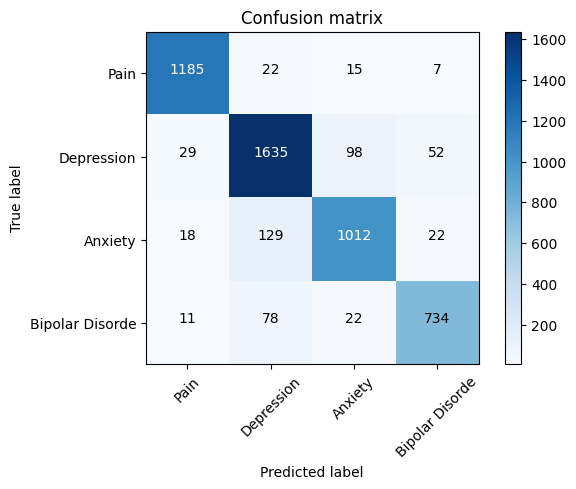

In [81]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
# cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
# plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
cm=metrics.confusion_matrix(y_test,pred,labels=['Pain','Depression','Anxiety','Bipolar Disorde'])
plot_confusion_matrix(cm,classes=['Pain','Depression','Anxiety','Bipolar Disorde'])


## TFIDF : Trigrams

accuracy:   0.906
Confusion matrix, without normalization


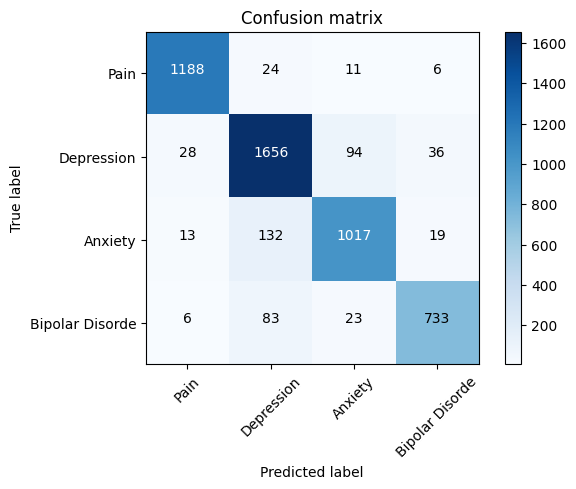

In [90]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
# cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
# plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
cm=metrics.confusion_matrix(y_test,pred,labels=['Pain','Depression','Anxiety','Bipolar Disorde'])
plot_confusion_matrix(cm,classes=['Pain','Depression','Anxiety','Bipolar Disorde'])

## Most important Features

In [89]:
# def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):

#     # Get the index of the class label
#     label_id = list(classifier.classes_).index(classlabel)

#     # Get the feature names from the vectorizer
#     feature_names = vectorizer.get_feature_names_out()

#     # Get the coefficients and corresponding feature names for the specified class
#     top_n_features = sorted(zip(classifier.coef_[label_id], feature_names))[-n:]

#     # Print the top features
#     for coef, feat in top_n_features:
#         print(classlabel, feat, coef)

# # Example usage:
# # Assuming tfidf_vectorizer and pass_tf are defined elsewhere in your code
# # Make sure pass_tf is a trained classifier
# most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')

def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()

    # feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Pain')

Pain mynpain 0.7254389413573459
Pain myoclonic 0.7254389413573459
Pain gangster 0.824820416727654
Pain coli 0.9000012400560551
Pain endoctronologist 0.9809471313911267
Pain molar 0.9831699430159223
Pain recomanded 1.0022039593347065
Pain heap 1.0577715461209116
Pain intimidated 1.2527633184637579
Pain diter 1.8192971833390748


In [84]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')

Depression specialized 0.7979523416969194
Depression disliked 0.8296403311335478
Depression dislocated 0.8296403311335478
Depression klonipin 0.8466349307556574
Depression rang 0.8612982604805786
Depression amytriptiline 0.869515751807179
Depression amytriptyline 0.869515751807179
Depression lift 1.0027846541440948
Depression jizzed 1.0779346408300388
Depression contracted 1.3027840015308907


In [85]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Anxiety')

Anxiety consecutively 0.6255258922191339
Anxiety pseudotumor 0.6840970593834005
Anxiety menstural 0.7245121248818693
Anxiety delivers 0.7259249607941924
Anxiety tirelessly 0.7399121453641826
Anxiety reserve 0.7446959762387456
Anxiety refrained 0.9197029925635857
Anxiety proof 1.0227155287759733
Anxiety toparimate 1.045740106136542
Anxiety native 1.1766164551765166


In [86]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Bipolar Disorde')

Bipolar Disorde transitioning 0.6416910562539891
Bipolar Disorde iraq 0.6558984119475674
Bipolar Disorde fascitis 0.676079148666056
Bipolar Disorde ameliorated 0.710447073911467
Bipolar Disorde simple 0.7231658314471776
Bipolar Disorde thal 0.7844112437859276
Bipolar Disorde shakey 0.9054846167838118
Bipolar Disorde nutrition 0.9171574535538246
Bipolar Disorde taught 1.6449917144329567
Bipolar Disorde actualized 2.1946766795422965


In [87]:
X.tail()

,condition,review,review_clean
161270,Anxiety,"I have been taking Cymbalta for 15 months now. First 30mg and then six months later up it to 60mgs/day. It was prescribed to me for clinical depression. It works for the depression and I also noticed it has worked very well for anxiety also. My MD and I have discussed that I probably have had this anxiety disorder for some time and curtailed with the depression, Cymbalta has done well for both. Side effects are weight gain (5-10 lbs), and bad withdrawal effects if you miss a day or two - headaches. Otherwise, the medication has worked very well and I feel like I can live my life again.",taking cymbalta month first mg six month later mg day prescribed clinical depression work depression also noticed worked well anxiety also md discussed probably anxiety disorder time curtailed depression cymbalta done well side effect weight gain lb bad withdrawal effect miss day two headache otherwise medication worked well feel like live life
161276,Anxiety,"About 4 years ago I started having early-morning awakening/insomnia/anxiety after excessive alcohol consumption the night before. Discovered that I could prevent this by taking diazepam my wife had lying around. When this ran out my GP prescribed lorazepam 0.5 mg. Gradually this lost effectiveness (tolerance) so I quit, also cut down on alcohol. A year ago I had a stressful situation and started 0.5 mg daily for a month, but was able to stop again with no side effects. However, my early-morning awakening/insomnia/anxiety had become chronic and independent of alcohol. A month ago I started 0.5 mg daily for 10 days, had a severe withdrawal, had to taper off. So, yes, like others wrote here: it works great, but not for chronic use.",year ago started early morning awakening insomnia anxiety excessive alcohol consumption night discovered could prevent taking diazepam wife lying around ran gp prescribed lorazepam mg gradually lost effectiveness tolerance quit also cut alcohol year ago stressful situation started mg daily month able stop side effect however early morning awakening insomnia anxiety become chronic independent alcohol month ago started mg daily day severe withdrawal taper yes like others wrote work great chronic use
161283,Bipolar Disorde,"I was in a very bad place at the time I started taking it. My doctor wanted to ween me off of Effexor after 7 years of 300mg of it. I&#039;ll tell you coming off the Effexor is like coming off hard drugs like heroine! I&#039;m not sure if the Zeldox (what they call geodon in Canada) was helping or making it worse. I officially got off the effexor after 10 weeks of weening and I&#039;m still currently on 80mg of Zeldox. I will say you have to eat with this med or else you&#039;re really only giving your body half of what you&#039;re putting in it. I&#039;m a week into lithium at 600mg. I&#039;m feeling fantastic, but I&#039;m thinking about weening off of the Zeldox, I do not believe its being effective and I&#039;m just getting negative side effects from it.",bad place time started taking doctor wanted ween effexor year mg tell coming effexor like coming hard drug like heroine sure zeldox call geodon canada helping making worse officially got effexor week weening still currently mg zeldox say eat med else really giving body half putting week lithium mg feeling fantastic thinking weening zeldox believe effective getting negative side effect
161286,Depression,"This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap
161287,Anxiety,"I was super against taking medication. I&#039;ve started dealing with anxiety (some depression) for awhile now. I got prescribed Ativan months ago, and never took it. I thought I c

In [94]:
text =["i am taking too much drug to release my fear"]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

'Pain'